# ***1--loda library***

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import r2_score , mean_squared_error , mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier ,BaggingClassifier , AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import  KNeighborsClassifier 
from sklearn import svm
from sklearn.metrics import accuracy_score 
from warnings import filterwarnings
filterwarnings('ignore')

# ***2--loda data*** 

In [2]:

df = pd.read_csv("D:/dataset/Algerian_forest_fires_dataset.csv")
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


# ***3--EDR***

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [4]:
df.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
dtype: int64

In [5]:
df.isna().any()

day            True
month          True
year           True
Temperature    True
 RH            True
 Ws            True
Rain           True
FFMC           True
DMC            True
DC             True
ISI            True
BUI            True
FWI            True
Classes        True
dtype: bool

# ***4--preprocessing***

In [6]:
df.loc[[123]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# drop null or na  in all dataset
df = df.dropna().reset_index(drop=True)

In [8]:
df.loc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [9]:
# drop null or na or nan in spcified col 
df = df.drop(122).reset_index(drop=True)

In [10]:
df.loc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire


In [11]:
df.head(126)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,30,9,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
123,2,6,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
124,3,6,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4    RH          243 non-null    object
 5    Ws          243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
dtypes: object(14)
memory usage: 26.7+ KB


In [13]:
# Fix spaces is column names
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [14]:
# Change the req columns as int datatypes
features = ['day', 'month', 'year', 'Temperature', 'RH', 'Ws']

for feature in features:
    df[feature] = df[feature].astype(int)

In [15]:
# Change the req columns a float datatypes
obj_dtypes = [features for features in df.columns if df[features].dtypes == 'O' ]
obj_dtypes

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [16]:
for feature in obj_dtypes:
    if feature!="Classes":
        df[feature] = df[feature].astype(float)
        

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
dtypes: float64(7), int32(6), object(1)
memory usage: 21.0+ KB


In [18]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [19]:
#df_copy = df2.drop(columns=['day','month','year'], axis=1)

In [20]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [21]:
df['Classes'] = df['Classes'].str.strip()
df['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [22]:
df['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [23]:
df['Classes'] = df['Classes'].map({'not fire': 0, 'fire': 1})

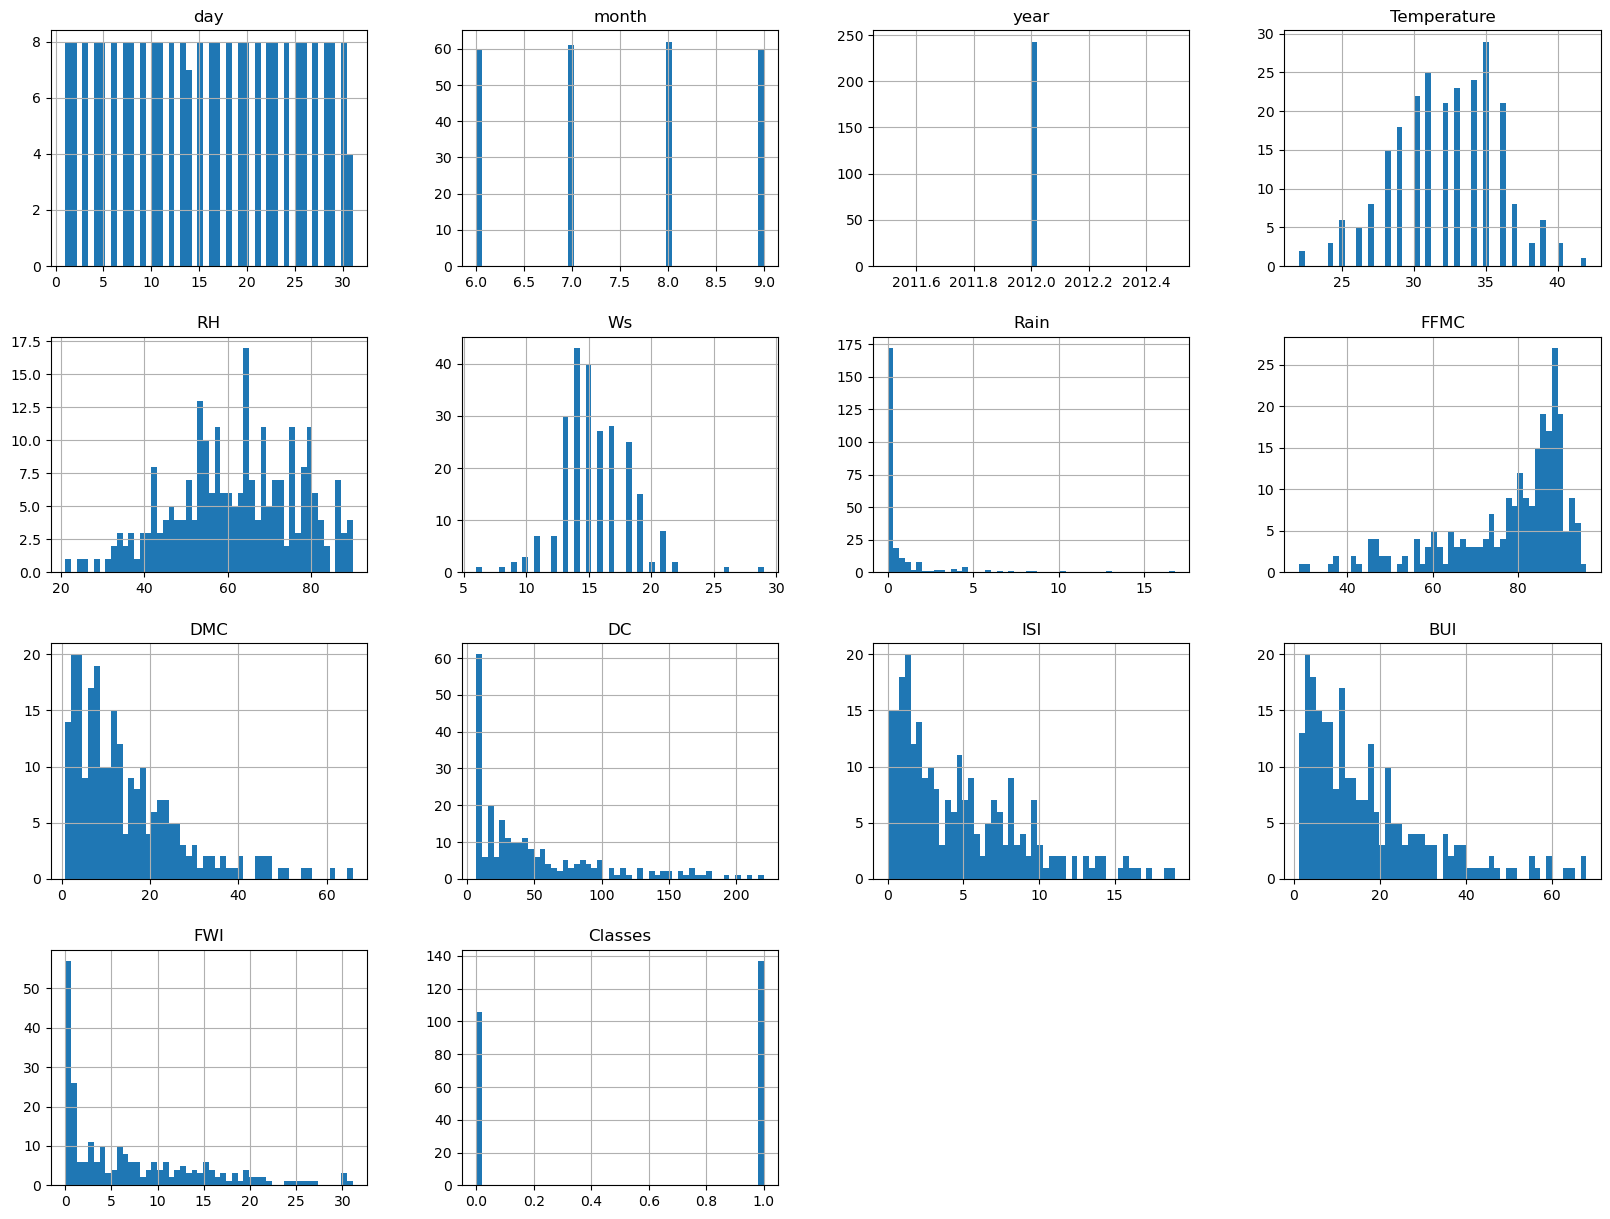

In [24]:
df.hist(bins=50,figsize=(20,15))
plt.show()

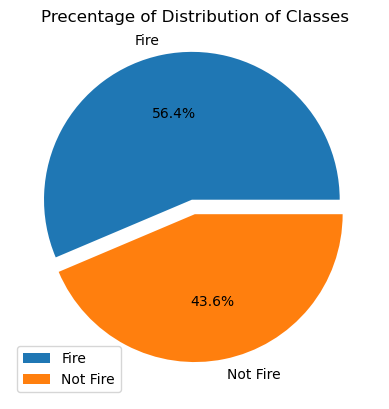

In [25]:
# Percentage of pie chart
percentage = df['Classes'].value_counts(normalize=True)*100
Class_labels = ['Fire','Not Fire']
plt.pie(percentage,labels=Class_labels, autopct='%1.1f%%', explode=[0.1,0])
plt.title("Precentage of Distribution of Classes")
plt.legend()

Text(0.5, 1.0, 'Correlation Matrix')

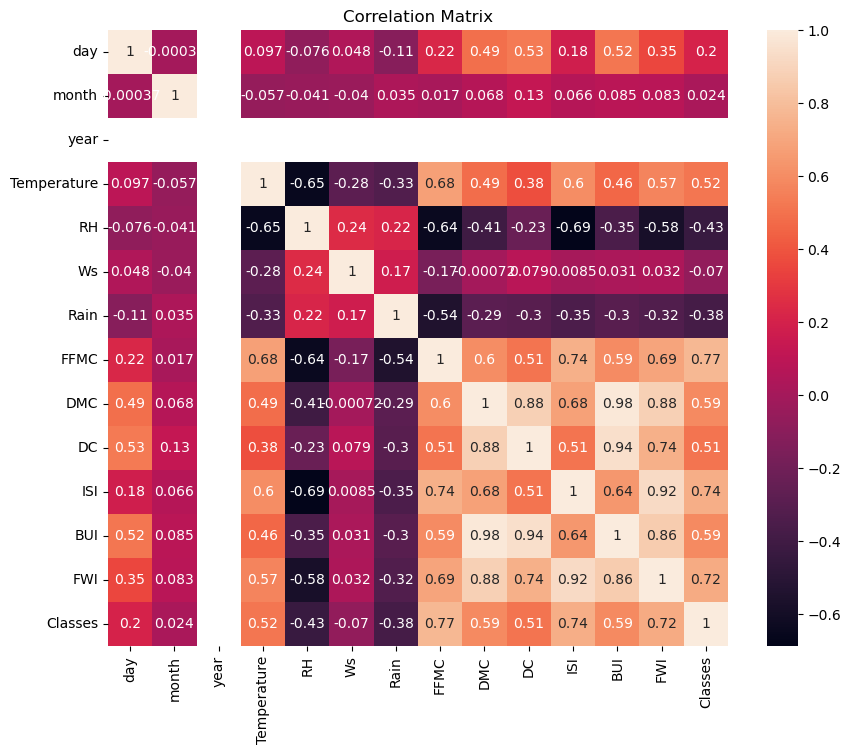

In [26]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation Matrix")

In [27]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

# ***1--Classefication***

In [28]:
X = df.drop(columns=['Classes'], axis=1)
y = df['Classes']

In [29]:
# scaling the X (train and test)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [30]:
# spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape

((182, 13), (61, 13))

In [31]:

model_lr =LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

In [32]:
y_pred = model_lr.predict(X_test)

In [33]:
y_pred = model_lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred)
print(f'accuracy_LogisticRegression ==  {acc_lr}')

accuracy_LogisticRegression ==  0.9180327868852459


In [34]:
model_svm = svm.SVC()
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)
print(f'accuracy_SVM ==  {acc_svm}')

accuracy_SVM ==  0.9344262295081968


In [35]:
model_ada = AdaBoostClassifier()
model_ada.fit(X_train, y_train)
y_pred = model_ada.predict(X_test)
acc_ada = accuracy_score(y_test, y_pred)
print(f'accuracy_adaBoosting ==  {acc_ada}')

accuracy_adaBoosting ==  0.9836065573770492


In [36]:
model_bg = BaggingClassifier()
model_bg.fit(X_train, y_train)
y_pred = model_bg.predict(X_test)
acc_bg = accuracy_score(y_test, y_pred)
print(f'accuracy_Bagging ==  {acc_bg}')

accuracy_Bagging ==  0.9836065573770492


In [37]:
model_rf =RandomForestClassifier()
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred)
print(f'accuracy_randomForest ==  {acc_lr}')

accuracy_randomForest ==  0.9180327868852459


In [38]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred)
print(f'accuracy_KNN ==  {acc_lr}')

accuracy_KNN ==  0.9180327868852459


In [39]:
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
y_pred = model_nb.predict(X_test)
acc_nb = accuracy_score(y_test, y_pred)
print(f'accuracy_nb ==  {acc_nb}')

accuracy_nb ==  0.9344262295081968


In [40]:
model_gb = GradientBoostingClassifier()
model_gb.fit(X_train, y_train)
y_pred = model_gb.predict(X_test)
acc_gb = accuracy_score(y_test, y_pred)
print(f'accuracy_GB ==  {acc_gb}')

accuracy_GB ==  1.0


In [41]:
d = {'models': ['SVM','GradientBoost', 'LogisticRegression',
                 'BaggingClassifier', 'GaussianNB', 'KNeighborsClassifier', 'AdaBoostClassifier', 'RandomForestClassifier' ],
      'accuracy': [acc_svm, acc_gb , acc_lr, acc_gb, acc_nb, acc_knn, acc_ada, acc_rf]}
df_acc = pd.DataFrame(data=d)
df_acc

,models,accuracy
0,SVM,0.934426
1,GradientBoost,1.000000
2,LogisticRegression,0.918033
3,BaggingClassifier,1.000000
4,GaussianNB,0.934426
5,KNeighborsClassifier,0.934426
6,AdaBoostClassifier,0.983607
7,RandomForestClassifier,0.983607


<Axes: >

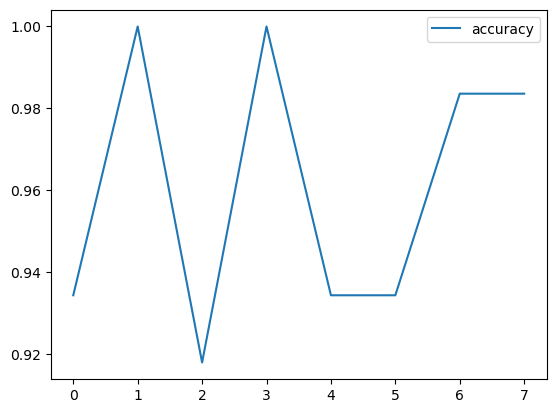

In [64]:
df_acc.plot()

# ***2-- Regression model***

In [42]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0


In [43]:
X = df.drop(columns=['FWI'], axis=1)
y = df['FWI']

In [44]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape

((182, 13), (61, 13))

In [46]:
from sklearn.ensemble import RandomForestRegressor ,BaggingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression , Lasso, Ridge
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import svm 

In [47]:
model = svm.SVR()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse_svm = mean_squared_error(y_pred,y_test)
mae_svm = mean_absolute_error(y_pred,y_test)
r2_svm = r2_score(y_test,y_pred)

print("MSE : ",mse_svm)
print("MAE : ",mae_svm)
print("R2_score : ",r2_svm)

MSE :  4.148993995080289
MAE :  1.1225579127692569
R2_score :  0.9062597580930722


In [48]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse_rf = mean_squared_error(y_pred,y_test)
mae_rf = mean_absolute_error(y_pred,y_test)
r2_rf = r2_score(y_test,y_pred)

print("MSE : ",mse_rf)
print("MAE : ",mae_rf)
print("R2_score : ",r2_rf)

MSE :  0.9595251147540981
MAE :  0.6230163934426226
R2_score :  0.9783209817899288


In [49]:
model = Ridge()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse_r = mean_squared_error(y_pred,y_test)
mae_r = mean_absolute_error(y_pred,y_test)
r2_r = r2_score(y_test,y_pred)

print("MSE : ",mse_r)
print("MAE : ",mae_r)
print("R2_score : ",r2_r)

MSE :  1.504284564209758
MAE :  0.9221967740086302
R2_score :  0.966012966248424


In [50]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse_lr = mean_squared_error(y_pred,y_test)
mae_lr = mean_absolute_error(y_pred,y_test)
r2_lr = r2_score(y_test,y_pred)

print("MSE : ",mse_lr)
print("MAE : ",mae_lr)
print("R2_score : ",r2_lr)

MSE :  0.4983607647628382
MAE :  0.47109720893082324
R2_score :  0.9887402925380985


In [51]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse_knn = mean_squared_error(y_pred,y_test)
mae_knn = mean_absolute_error(y_pred,y_test)
r2_knn = r2_score(y_test,y_pred)

print("MSE : ",mse_knn)
print("MAE : ",mae_knn)
print("R2_score : ",r2_knn)

MSE :  3.4416786885245894
MAE :  1.2891803278688523
R2_score :  0.9222404772793678


In [52]:
model = Lasso()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse_l = mean_squared_error(y_pred,y_test)
mae_l = mean_absolute_error(y_pred,y_test)
r2_l = r2_score(y_test,y_pred)

print("MSE : ",mse_l)
print("MAE : ",mae_l)
print("R2_score : ",r2_l)

MSE :  25.71089983315942
MAE :  3.9772267093162728
R2_score :  0.4191011187620408


In [53]:
model = AdaBoostRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse_ada = mean_squared_error(y_pred,y_test)
mae_ada = mean_absolute_error(y_pred,y_test)
r2_ada = r2_score(y_test,y_pred)

print("MSE : ",mse_ada)
print("MAE : ",mae_ada)
print("R2_score : ",r2_ada)

MSE :  1.802448648645624
MAE :  1.0832448244418786
R2_score :  0.9592763998817053


In [54]:
model = BaggingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse_br = mean_squared_error(y_pred,y_test)
mae_br = mean_absolute_error(y_pred,y_test)
r2_br = r2_score(y_test,y_pred)

print("MSE : ",mse_br)
print("MAE : ",mae_br)
print("R2_score : ",r2_br)

MSE :  1.8427983606557383
MAE :  0.7857377049180329
R2_score :  0.9583647591877954


In [55]:
model = MLPRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse_ml = mean_squared_error(y_pred,y_test)
mae_ml = mean_absolute_error(y_pred,y_test)
r2_ml = r2_score(y_test,y_pred)

print("MSE : ",mse_ml)
print("MAE : ",mae_ml)
print("R2_score : ",r2_ml)

MSE :  12.368950801624678
MAE :  2.8516734798135244
R2_score :  0.720542270812145


In [56]:
d = {'models': ['AdaBoostRegressor', 'BaggingRegressor', 'KNeighborsRegressor', 'Lasso', 'RandomForestRegressor','svm','LinearRegression','MLPRegressor'
                 ],
      'R2': [r2_ada, r2_br, r2_knn, r2_l,r2_rf, r2_svm,r2_lr, r2_ml],
     'MAE' : [mae_ada, mae_br,mae_knn,mae_l, mae_rf, mae_svm, mae_lr,mae_ml],'MSA': [mse_ada, mse_br,mse_knn,mse_l, mse_rf, mse_svm, mse_lr,mse_ml]}
df = pd.DataFrame(data=d)
df

,models,R2,MAE,MSA
0,AdaBoostRegressor,0.959276,1.083245,1.802449
1,BaggingRegressor,0.958365,0.785738,1.842798
2,KNeighborsRegressor,0.922240,1.289180,3.441679
3,Lasso,0.419101,3.977227,25.710900
4,RandomForestRegressor,0.978321,0.623016,0.959525
5,svm,0.906260,1.122558,4.148994
6,LinearRegression,0.988740,0.471097,0.498361
7,MLPRegressor,0.720542,2.851673,12.368951


<Axes: >

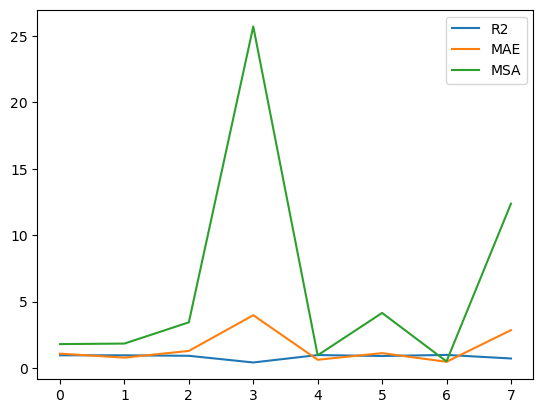

In [70]:
df.plot()